In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [ ]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.shape

(768, 9)

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


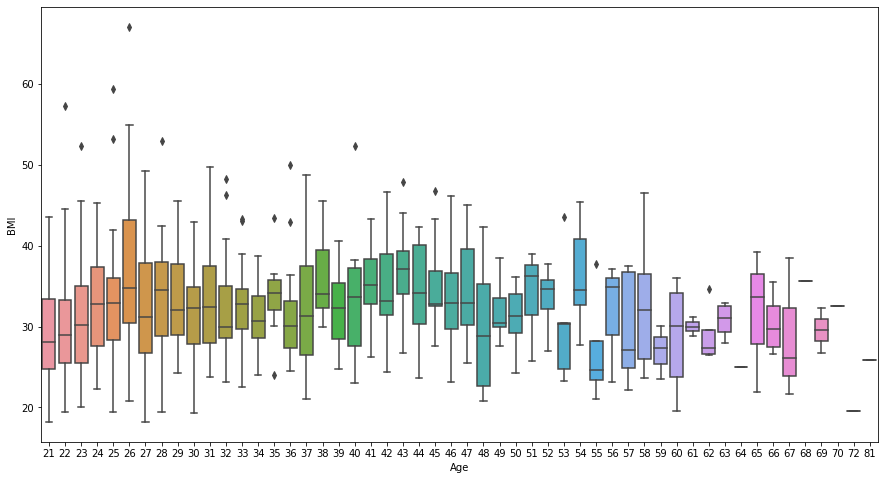

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Age',y='BMI',data=data)

In [ ]:
X=data.iloc[:,0:-1]
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6    148.0           72.0  ...  33.6                     0.627   50
1              1     85.0           66.0  ...  26.6                     0.351   31
2              8    183.0           64.0  ...  23.3                     0.672   32
3              1     89.0           66.0  ...  28.1                     0.167   21
4              0    137.0           40.0  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10    101.0           76.0  ...  32.9                     0.171   63
764            2    122.0           70.0  ...  36.8                     0.340   27
765            5    121.0           72.0  ...  26.2                     0.245   30
766            1    126.0           60.0  ...  30.1                     0.349   47
767            1     93.0           70.0  ...  30.4                     0.315   23

[76

In [ ]:
y=data.iloc[:,-1]
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
data['Insulin'].value_counts()

125.0    378
105.0     11
130.0      9
140.0      9
120.0      8
        ... 
272.0      1
41.0       1
25.0       1
600.0      1
59.0       1
Name: Insulin, Length: 185, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(537, 8)

In [ ]:
model=Sequential()
model.add(Dense(500,activation='tanh',kernel_regularizer='l1_l2',kernel_initializer='Zeros',input_dim=X_train.shape[1]))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               4500      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 5,001
Trainable params: 5,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=250,batch_size=60,validation_split=0.4)

Epoch 1/250
6/6 [==============================] - 0s 29ms/step - loss: 2.5251 - accuracy: 0.6273 - val_loss: 1.4595 - val_accuracy: 0.3581
Epoch 2/250
6/6 [==============================] - 0s 7ms/step - loss: 1.2771 - accuracy: 0.5901 - val_loss: 1.0938 - val_accuracy: 0.3581
Epoch 3/250
6/6 [==============================] - 0s 5ms/step - loss: 1.0668 - accuracy: 0.5031 - val_loss: 1.1823 - val_accuracy: 0.6419
Epoch 4/250
6/6 [==============================] - 0s 5ms/step - loss: 0.9050 - accuracy: 0.5404 - val_loss: 0.6891 - val_accuracy: 0.6558
Epoch 5/250
6/6 [==============================] - 0s 6ms/step - loss: 0.7379 - accuracy: 0.6615 - val_loss: 0.8045 - val_accuracy: 0.5070
Epoch 6/250
6/6 [==============================] - 0s 5ms/step - loss: 0.7317 - accuracy: 0.6056 - val_loss: 0.7523 - val_accuracy: 0.6419
Epoch 7/250
6/6 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.6366 - val_loss: 0.6375 - val_accuracy: 0.6558
Epoch 8/250
6/6 [=========

In [ ]:
model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7749


[0.5261304974555969, 0.7748917937278748]

In [ ]:

y_pred=model.predict(X_test) 

In [ ]:
model.predict([[8,183,64,0,0,23.3,0.672,32]])

array([[0.5240105]], dtype=float32)

In [ ]:
'''y_prediction=[]
for y_predi in y_pred:
  if y_predi>0.5:
    y_predi=1
    y_prediction.append(y_predi)
  else:
    y_predi=0
    y_prediction.append(y_predi)'''


In [ ]:
model.save('filenames.h5')